In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.00, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -90.00, high = 90.00, size = 1500)

# zip the lats and langs together as pairs

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count

len(cities)
    

611

In [6]:
# Import the requests library.
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in th eset of 50
    if(i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
     # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# To handle the errors     
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | inirida
Processing Record 3 of Set 1 | guajara
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | puerto madryn
Processing Record 6 of Set 1 | saint-francois
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | cruzilia
Processing Record 10 of Set 1 | totness
Processing Record 11 of Set 1 | bluffton
Processing Record 12 of Set 1 | kathmandu
Processing Record 13 of Set 1 | talcahuano
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | khanino
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | brae
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | naustdal
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping

Processing Record 37 of Set 4 | caravelas
Processing Record 38 of Set 4 | preetz
Processing Record 39 of Set 4 | kamenka
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | marinette
Processing Record 42 of Set 4 | meybod
Processing Record 43 of Set 4 | tafresh
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | mangrol
Processing Record 46 of Set 4 | kyabe
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | gangotri
City not found. Skipping...
Processing Record 50 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | soyo
Processing Record 2 of Set 5 | korla
Processing Record 3 of Set 5 | najran
Processing Record 4 of Set 5 | curitibanos
Processing Record 5 of Set 5 | jatai
Processing Record 6 of Set 5 | mbuyapey
Processing Record 7 of Set 5 | arlit
Processing Record 8 of Set 5 | areosa
Processing Record 9 of Set 5 | aswan
Pr

Processing Record 27 of Set 8 | am timan
Processing Record 28 of Set 8 | pitimbu
Processing Record 29 of Set 8 | puerto leguizamo
Processing Record 30 of Set 8 | paradwip
City not found. Skipping...
Processing Record 31 of Set 8 | oltu
Processing Record 32 of Set 8 | ipameri
Processing Record 33 of Set 8 | axim
Processing Record 34 of Set 8 | tunduru
City not found. Skipping...
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | ongandjera
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | zastron
Processing Record 39 of Set 8 | kayasula
Processing Record 40 of Set 8 | santa rosa
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | shache
Processing Record 43 of Set 8 | villa carlos paz
Processing Record 44 of Set 8 | vilhena
Processing Record 45 of Set 8 | pimentel
Processing Record 46 of Set 8 | oriximina
Processing Record 47 of Set 8 | luba
Processing Record 48 of Set 8 | meiganga
Processing Record 49 of Set 8 |

Processing Record 15 of Set 12 | chabahar
Processing Record 16 of Set 12 | balkhash
Processing Record 17 of Set 12 | mananara
Processing Record 18 of Set 12 | nuristan
Processing Record 19 of Set 12 | doka
Processing Record 20 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 21 of Set 12 | poshekhonye
Processing Record 22 of Set 12 | torzhok
Processing Record 23 of Set 12 | toftir
City not found. Skipping...
Processing Record 24 of Set 12 | ustka
Processing Record 25 of Set 12 | novosokolniki
Processing Record 26 of Set 12 | krasnopillya
Processing Record 27 of Set 12 | verkhoturye
Processing Record 28 of Set 12 | progreso
Processing Record 29 of Set 12 | tambopata
Processing Record 30 of Set 12 | tarauaca
Processing Record 31 of Set 12 | karambakkudi
Processing Record 32 of Set 12 | koupela
Processing Record 33 of Set 12 | george
Processing Record 34 of Set 12 | anastasiyevskaya
Processing Record 35 of Set 12 | raudeberg
Processing Record 36 of Set 12 | yarmouth
P

In [8]:
len(city_data)

562

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,66.20,48,16,18.34,ZA,2020-11-25 15:58:16
1,Inirida,3.87,-67.92,91.17,58,90,0.78,CO,2020-11-25 16:00:48
2,Guajara,-2.97,-57.67,84.36,78,100,3.40,BR,2020-11-25 16:00:48
3,Port Alfred,-33.59,26.89,65.14,60,18,12.39,ZA,2020-11-25 16:00:48
4,Puerto Madryn,-42.77,-65.04,62.60,42,75,5.82,AR,2020-11-25 15:57:54
5,Saint-Francois,46.42,3.91,51.80,76,0,4.70,FR,2020-11-25 16:00:48
6,Ushuaia,-54.80,-68.30,50.00,57,75,1.92,AR,2020-11-25 16:00:48
7,Codrington,-38.27,141.97,55.45,92,0,6.96,AU,2020-11-25 16:00:48
8,Cruzilia,-21.84,-44.81,75.38,64,62,3.38,BR,2020-11-25 15:56:07
9,Totness,5.88,-56.32,86.34,59,89,9.06,SR,2020-11-25 16:00:49


In [10]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-11-25 15:58:16,-34.53,20.04,66.20,48,16,18.34
1,Inirida,CO,2020-11-25 16:00:48,3.87,-67.92,91.17,58,90,0.78
2,Guajara,BR,2020-11-25 16:00:48,-2.97,-57.67,84.36,78,100,3.40
3,Port Alfred,ZA,2020-11-25 16:00:48,-33.59,26.89,65.14,60,18,12.39
4,Puerto Madryn,AR,2020-11-25 15:57:54,-42.77,-65.04,62.60,42,75,5.82
5,Saint-Francois,FR,2020-11-25 16:00:48,46.42,3.91,51.80,76,0,4.70
6,Ushuaia,AR,2020-11-25 16:00:48,-54.80,-68.30,50.00,57,75,1.92
7,Codrington,AU,2020-11-25 16:00:48,-38.27,141.97,55.45,92,0,6.96
8,Cruzilia,BR,2020-11-25 15:56:07,-21.84,-44.81,75.38,64,62,3.38
9,Totness,SR,2020-11-25 16:00:49,5.88,-56.32,86.34,59,89,9.06


In [11]:
# create an output file in CSV format

output_data_file = "weather_data/cities.csv"

# Export the city_data_df into the above csv

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Craete scattered plot for latitude vs maximum temperature, humidity, cloudiness, and wind speed from all the cities.
# get the data to craete the plot

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]





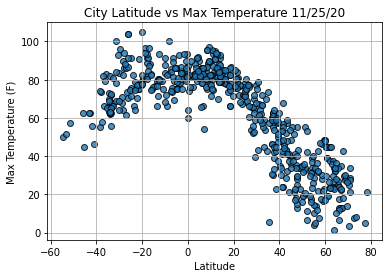

In [17]:
#Import tie module
import time

#build the scatter plot for lat vs max temperature

plt.scatter(lats, max_temps, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

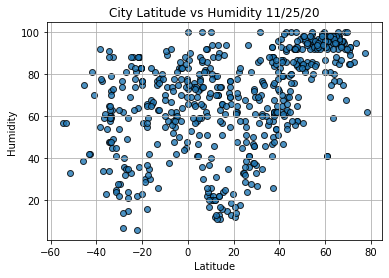

In [18]:
#build the scatter plot for lat vs humidity

plt.scatter(lats, humidity, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show Plot
plt.show()

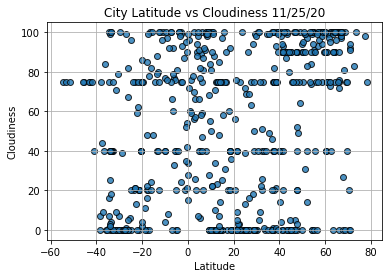

In [19]:
#build the scatter plot for lat vs Cloudiness

plt.scatter(lats, cloudiness, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show Plot
plt.show()

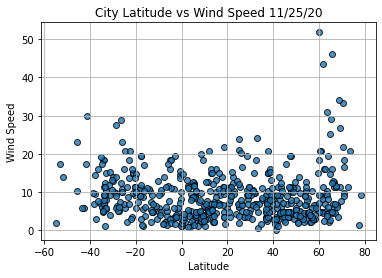

In [20]:
#build the scatter plot for lat vs Wind Speed

plt.scatter(lats, wind_speed, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show Plot
plt.show()